<a href="https://colab.research.google.com/github/tomaraayushi/ML_Projects/blob/main/Soccer_Dataset_Linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression Model to predict the scores of EPL Soccer Players**


## **Project Overview**



The English Premier League is one of the world's most-watched soccer leagues, with an estimated audience of 12 million people per game.
With the substantial financial benefits, all significant teams of EPL are interested in Analytics and AI. Regarding sports analytics, machine learning and artificial intelligence (AI) have become extremely popular. The sports entertainment sector and the relevant stakeholders extensively use sophisticated algorithms to improve earnings and reduce business risk associated with selecting or betting on the wrong players.


<br>

![image](https://cdn.pixabay.com/photo/2016/04/15/20/28/football-1331838__340.jpg)

<br>


Regression is one of the foundational techniques in Machine Learning. As one of the most well-understood algorithms, linear regression plays a vital role in solving real-life problems.


## **Business Problem**

In this project, we wish to use Linear Regression to predict the scores of EPL soccer players.

## **Approach**

* Install Packages
* Import Libraries
* Data Reading from Different Sources
* Exploratory Data Analysis
* Correlation
* Relationship between Cost and Score
* Train - Test Split
* Linear Regression
* Model Summary
* Prediction on Test Data
* Diagnostics and Remedies

## **Conclusion**


**Predicting Player Scores Based on Cost**

In this analysis, we employed a linear regression model to understand the relationship between the cost of players and their corresponding scores. The dataset was subjected to a square-root transformation to ensure the adherence to regression assumptions.

### Key Findings:

1. **Strong Predictive Power (R-squared):**
   - The model demonstrates a substantial explanatory power with an R-squared value of 0.895. This implies that approximately 89.5% of the variance in player scores can be explained by their costs. Therefore, the cost factor is highly indicative of a player's performance on the field.

2. **Linear Relationship:**
   - The regression coefficient for the 'Cost' variable is 0.0234 (p < 0.001), signifying that for every unit increase in cost, the player's score is expected to increase by 0.0234 units. This direct relationship highlights that as the investment in a player increases, there is a corresponding positive impact on their performance.

3. **Intercept (Constant):**
   - The intercept of 1.9674 (p < 0.001) suggests that even with a cost of zero, a player is expected to have a base score of approximately 1.9674. This establishes a minimum benchmark for player performance, indicating that regardless of cost, there are inherent factors contributing to a player's score.

### Practical Implications:

1. **Recruitment Strategy:**
   - Recruiters can utilize the regression equation (Score = 1.9674 + 0.0234 * Cost) to make informed decisions about player acquisitions. By understanding the expected increase in score per unit increase in cost, clubs can optimize their budgets and select players that align with their performance expectations.

2. **Budget Allocation:**
   - Clubs can allocate their budgets more efficiently by considering the predicted scores corresponding to different cost brackets. This allows for a strategic allocation of financial resources, ensuring that investments are made in players who are likely to provide higher on-field contributions relative to their costs.

3. **Identifying Value for Money:**
   - The model enables the identification of players who offer exceptional value for money. By comparing predicted scores against actual costs, clubs can pinpoint players whose performance surpasses what would typically be expected given their investment, making them valuable assets to pursue.

4. **Performance Improvement Strategies:**
   - Clubs can use the insights from this analysis to develop targeted training programs or support systems for players whose performance does not align with their costs. This data-driven approach can aid in player development, potentially increasing their scores and overall contribution to the team.

In summary, this regression analysis provides a robust framework for understanding the relationship between a player's cost and their performance score. By leveraging this model, recruiters can make informed, data-driven decisions, optimizing their player acquisitions and ultimately enhancing the overall competitiveness and success of their team.









In [ ]:
#Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy



In [ ]:
#Load the data as a data frame and view the data

df = pd.read_csv('EPL_Soccer_MLR_LR.csv')
df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


In [ ]:
#Get the basic information of each variable format, also look for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [ ]:
#Explore the data by using decriptive statistics

df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [ ]:
#Exploratory Analysis by finding correaltion between variables
df.corr()

<ipython-input-6-b4b75360e3d3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


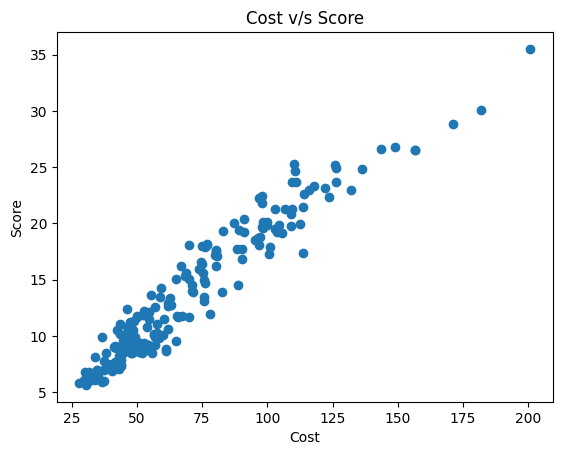

In [ ]:
#The correlation coefficient b/x cost and score is 0.96 which indicates strong positive relationship
#Plot a scatter plot b/w cost and score to see the relationship b/w these two variables vsiually

plt.scatter(df['Cost'], df['Score'])
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Cost v/s Score")
plt.show()

In [ ]:
#Now the Pearson coefficient and scatter plot both show that as the cost increase, there is an increament in score as well
#But can we tell that how much money should be spent to acheive a specific score or can we predict the score with the value of cost
#So, we will use Linear Regression Model to find the linear relationship b/w these variables and predict the scores with the values of cost

#Assing x and y for train-test split
x = df['Cost']
y = df['Score']

#Now split the data with 75% for training and 25% for testing the statistical model

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size = 0.25, random_state = 100)

In [ ]:
#Statistical approach to regression

lr =sm.OLS(y_train, x_train).fit()

#Print the parameters

lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.167e+04
Date:                Fri, 29 Sep 2023   Prob (F-statistic):                   3.84e-144
Time:                        15:34:58   Log-Likelihood:                         -297.42
No. Observations:                 151   AIC:                                      596.8
Df Residuals:                     150   BIC:                                      599.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cost           0.1929      0.002    108.014      0.000       0.189       0.196
==============================================================================
Omnibus:                        0.244   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.054
Skew:                           0.021   Prob(JB):                        0.974
Kurtosis:                       3.083   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Force the intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1976.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           6.91e-88
Time:                        16:32:47   Log-Likelihood:                -293.23
No. Observations:                 151   AIC:                             590.5
Df Residuals:                     149   BIC:                             596.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9472      0.325      2.916      0.0

const    0.947185
Cost     0.182083
dtype: float64


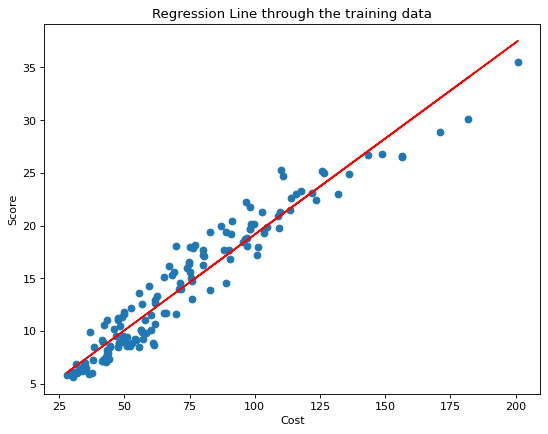

In [ ]:
#Extract B0 and B1
print(lr.params)
b0 = lr.params[0]
b1 = lr.params[1]

#Plot the fitted line on training data
figure(figsize=(8,6), dpi=80)
plt.scatter(x_train, y_train)

plt.plot(x_train, b0 + b1*x_train, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression Line through the training data")
plt.show()

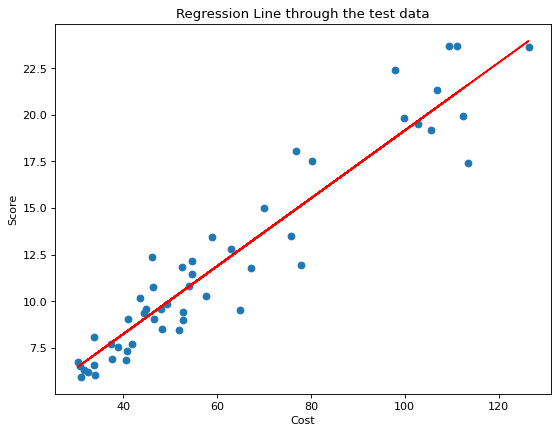

In [ ]:
#Prediction on test data
#Plot the fitted line on test data
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

figure(figsize=(8,6), dpi=80)
plt.scatter(x_test, y_test)
plt.plot(x_test,y_test_fitted, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression Line through the test data")
plt.show()

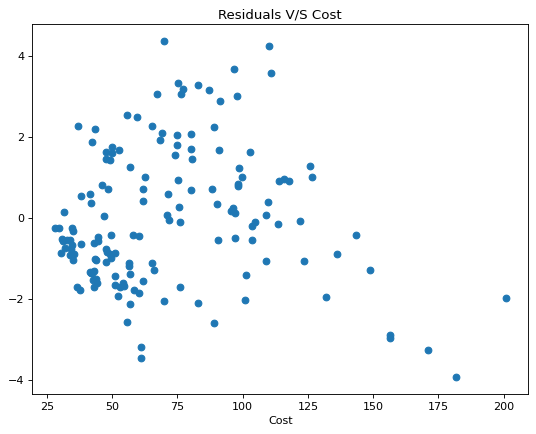

In [ ]:
#Diagnostics

#Diagno:
#Non-Linearity
#Non-Constant Variance
#Deviations from Normality
#Errors not independent and identically distributed
#Outliers
#Missing Predictors


#Build predictions on training-data
predictions_y = lr.predict(x_train_with_intercept)

#Find residuals
resids = (y_train - predictions_y)

#Plot the scatter plot on residuals vs Predictor in training-data
figure(figsize=(8,6), dpi=80)
plt.scatter(x_train, resids)
plt.xlabel("Cost")
plt.title("Residuals V/S Cost")
plt.show()


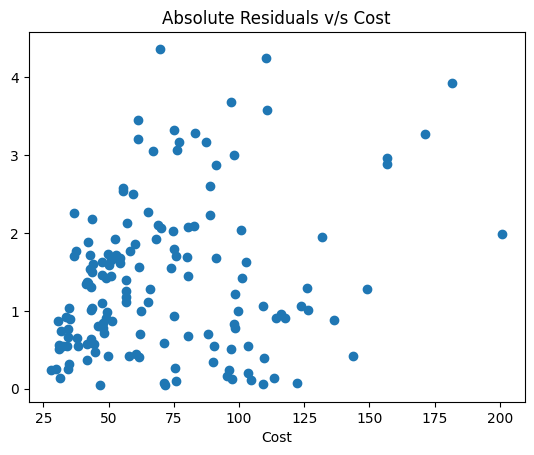

In [ ]:
#Plot the scatter plot with absolute value of residuals
abs_resids = np.abs(y_train - predictions_y)
plt.scatter(x_train, abs_resids)
plt.xlabel("Cost")
plt.title("Absolute Residuals v/s Cost")
plt.show()

((array([-2.60603471, -2.28639722, -2.10324767, -1.97158309, -1.867224  ,
         -1.7799545 , -1.70445293, -1.63757876, -1.57731662, -1.52229259,
         -1.47152616, -1.42429196, -1.3800376 , -1.33833223, -1.29883298,
         -1.26126233, -1.22539231, -1.19103324, -1.1580255 , -1.12623343,
         -1.09554071, -1.06584677, -1.03706405, -1.0091158 , -0.98193434,
         -0.95545967, -0.92963831, -0.90442237, -0.87976879, -0.85563868,
         -0.83199678, -0.80881102, -0.78605212, -0.76369328, -0.74170987,
         -0.7200792 , -0.69878032, -0.67779383, -0.65710172, -0.6366872 ,
         -0.61653466, -0.59662946, -0.57695791, -0.55750713, -0.53826504,
         -0.51922023, -0.50036191, -0.48167989, -0.4631645 , -0.44480656,
         -0.42659733, -0.40852846, -0.39059201, -0.37278035, -0.35508619,
         -0.33750252, -0.32002258, -0.3026399 , -0.28534819, -0.26814138,
         -0.25101361, -0.23395916, -0.2169725 , -0.20004822, -0.18318105,
         -0.16636584, -0.14959754, -0.

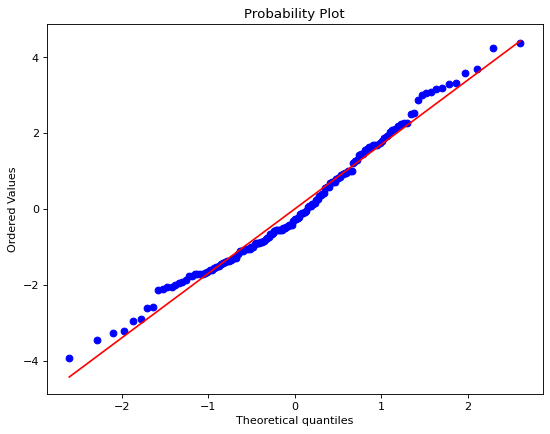

In [ ]:
#Normality plot
figure(figsize=(8,6), dpi=80)
scipy.stats.probplot(resids, plot=plt)

<Figure size 640x480 with 0 Axes>

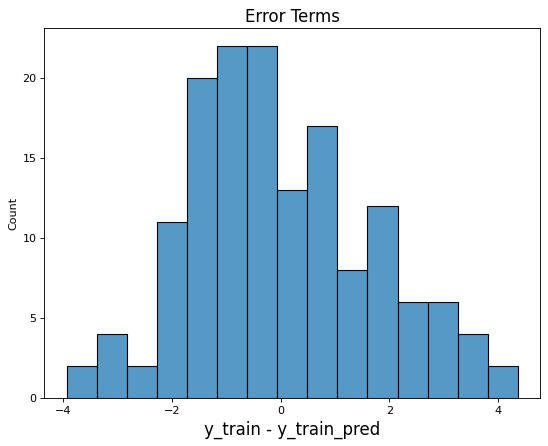

In [ ]:
# Evaluate normality through histogram of residuals
# Plotting the histogram using the residual values
fig = plt.figure()
figure(figsize=(8, 6), dpi=80)
sns.histplot(resids, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()


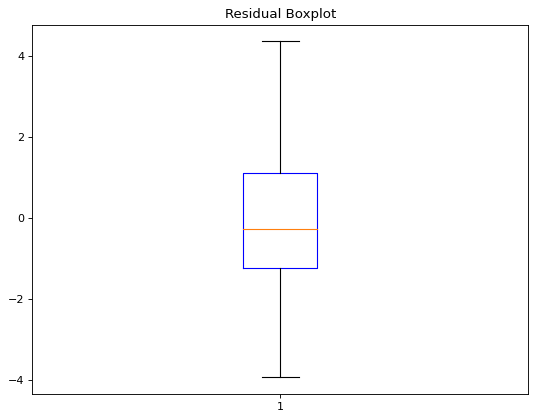

In [ ]:
#Boxplot for outliers
#plot
figure(figsize=(8, 6), dpi=80)
plt.boxplot(resids, boxprops=dict(color='blue'))
plt.title('Residual Boxplot');

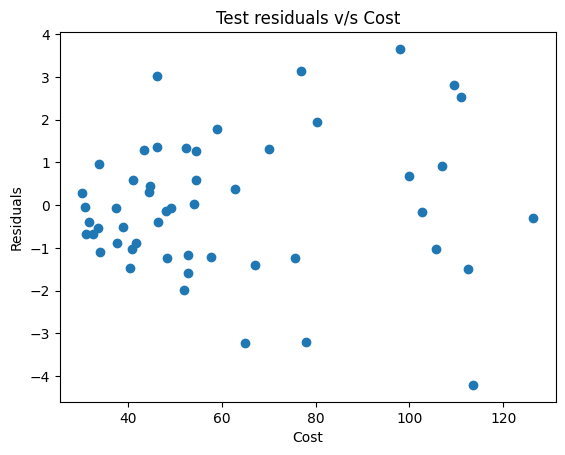

In [ ]:
#Deal with non-constant variance through transformation

test_residuals = (y_test - y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

#Plot a scatter plot for Residuals v/s Predictor in testing data
plt.scatter(x_test, test_residuals)
plt.xlabel("Cost")
plt.ylabel("Residuals")
plt.title("Test residuals v/s Cost")
plt.show()

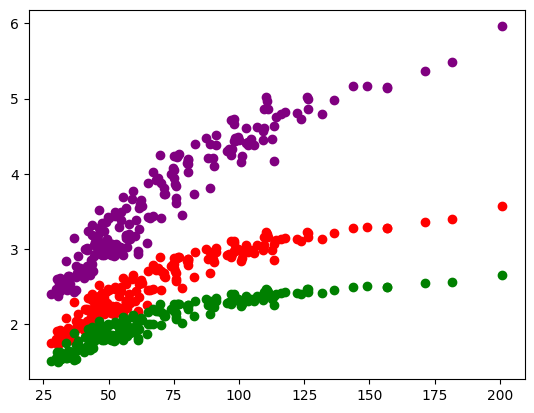

In [ ]:
#Introduce linerity with different transformations such as square-root, log, box-cox

#Tranformation with square-root
sqrt_y = np.sqrt(y)
plt.scatter(x, sqrt_y, color='purple')

#Transformation with log
ln_y = np.log(y)
plt.scatter(x, ln_y, color='red')

#Transformation with box-cox
box_y = list(stats.boxcox(y))
box_y = box_y[0]
plt.scatter(x, box_y, color='green')
plt.show()

In [ ]:
#Run regression on this square-root set
x_train, x_test, y_train, y_test = train_test_split(x, sqrt_y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)


#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1267.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           9.72e-75
Time:                        20:25:18   Log-Likelihood:                -17.200
No. Observations:                 151   AIC:                             38.40
Df Residuals:                     149   BIC:                             44.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9674      0.052     37.683      0.0

const    1.967367
Cost     0.023433
dtype: float64


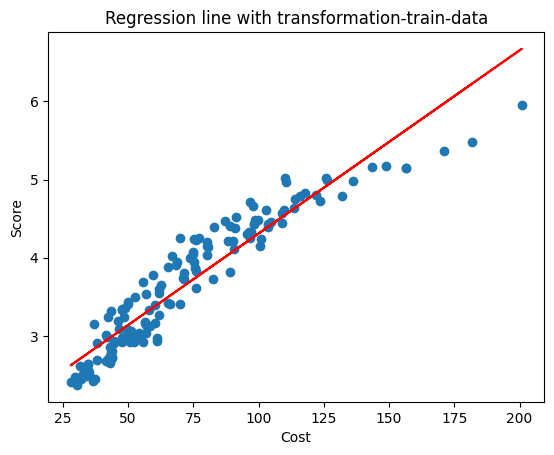

In [ ]:
#Extract B0 and B1
print(lr.params)
b0 = lr.params[0]
b1 = lr.params[1]

#Plot the fitted line on training-data
plt.scatter(x_train, y_train)
plt.plot(x_train, b0 + b1*x_train, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line with transformation-train-data")
plt.show()

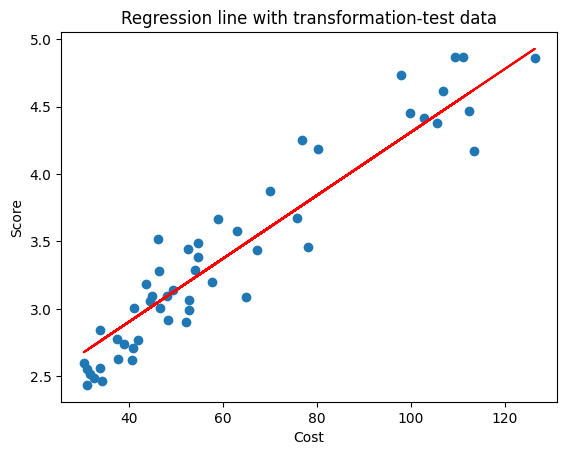

In [ ]:
#Plot the fitetd line on test-data

x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line with transformation-test data")
plt.show()

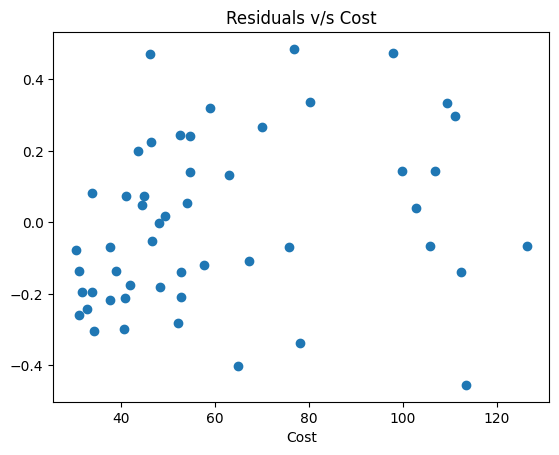

In [ ]:
#Evaluate variance
#Diagnostics

test_residuals = (y_test - y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

#Plot a scatter on Residuals v/s Predictor
plt.scatter(x_test, test_residuals)
plt.xlabel("Cost")
plt.title("Residuals v/s Cost")
plt.show()